In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

**Central Limit Theorem (CLT)**  
If the size of the sample is sufficiently large, the probability distribution of the sample mean will approximate a normal distribution, regardless of the probability distribution of the underlying population.

In other words, consider a random sample of _n_ observations drawn from a population with expected value $\mu$ and standard deviation $\sigma$. If _n_ is sufficiently large, the probability distribution of the sample mean $\bar{x}$ will approximate a normal distribution with mean $\mu_{\bar{x}} = \mu$ and standard deviation $\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$

The Central Limit Theorem says that the distribution of sample means become approximately normal as the sample size increases, no matter what the underlying population is, and at this level an arbitrary cutoff of n = 30 is applied as a standard rule of thumb as to what sample size is needed in order to use the CLT.  
For any underlying population, increasing the sample size will make the sampling distribution of the mean look more like the normal. No matter how strange the underlying distribution is, by the time the sample size gets to 30 the distribution will be passably close to the normal distribution.

[demo](https://www.zoology.ubc.ca/~whitlock/Kingfisher/CLT.htm)

<u>Exercise</u>  
On a flight there are 43 bags checked in. Historical records show that on that route the mean weight of checked bags is 12.1kg with a standard deviation of 3.8kg.  
What is the probability that the mean contents of the checked bags on this flight will be under 11 kg? (You may treat the bags on this flight as though they are a random sample of bags checked in on that route.)  
Even though you know nothing about the distribution of the weights of bags themselves, the Central Limit Theorem allows you to solve this.

<u>Exercise</u>  
The times for a particular journey during rush hour in a large city have mean 23.3 minutes and standard deviation 8.9 minutes.  
Find the probability that the mean time taken for a random sample of 60 of the times for this journey is under 25 minutes.

**Point estimate**  
A Point Estimate for a population parameter is a formula or equation that allows us to calculate a value to estimate that parameter.  
Example: sample variance/standard deviation, sample mean.  
A point estimate is a single numeric value, a 'best guess' of a population parameter, based on the data in a random sample.


**Confidence Interval**  
A confidence interval is an equation or formula that allows us to construct an interval that will contain the parameter to be estimated with a certain level of confidence.  
A confidence interval is an interval around the point estimate, calculated from the sample data, that is very likely to contain the true value of the population parameter.


**Confidence Interval - Large Sample**  
Given a sample with mean $\bar{x}$.  
We are looking for an interval [$\bar{x} - b$, $\bar{x} + b$] for which we can say with a level of confidence (1 - $\alpha$) of e.g. 95% that $\mu$ is inside this interval.  
$P(\bar{x} - b < \mu < \bar{x} + b) = 1 - \alpha = 0.95$ 

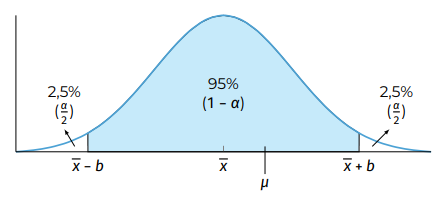

Because of the central limit theorem we know that $\bar{x} ∈ \bar{X} ∼ Nor(\mu, \frac{\sigma}{\sqrt{n}}) $  
And because of the symmetry we can say:  
$P(\bar{x} - b < \mu < \bar{x} + b) = P(\mu - b < \bar{x} < \mu + b)$ 

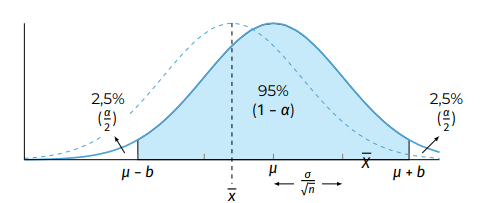

We now calculate the _z_-score for $\bar{x}: z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$  
We lookup (or calculate) the value $z_{\frac{\alpha}{2}}$ for which:  
$P(-z_{\frac{\alpha}{2}} < z < z_{\frac{\alpha}{2}}) = 1 - \alpha = 0.95$  
$P(z < z_{\frac{\alpha}{2}}) = 1 - \frac{\alpha}{2} = 0.975$  
$z_{\frac{\alpha}{2}}$ = stats.norm.isf(1 - 0.975, 0, 1) $≃ 1.96$  

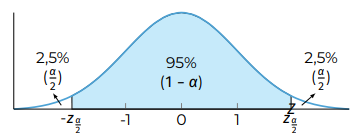





The result is:

$P(-1.96 < \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}} < 1.96) = 0.95$  
$P(\mu - 1.96 \frac{\sigma}{\sqrt{n}} < \bar{x} < \mu + 1.96 \frac{\sigma}{\sqrt{n}}) = 0.95$  
Because of symmetry we can swap $\mu$ and $\bar{x}$:  

$P(\bar{x} - 1.96 \frac{\sigma}{\sqrt{n}} < \mu < \bar{x} + 1.96 \frac{\sigma}{\sqrt{n}}) = 0.95$  
Now we can say with 95% confidence that: 
$ \mu ∈ [\bar{x} - 1.96 \frac{\sigma}{\sqrt{n}}, \bar{x} + 1.96 \frac{\sigma}{\sqrt{n}} ]$  
In practice we will use $s_{sample}$ as a point estimate for $\sigma_{population}$

To determine a confidence interval, we proceed as follows:

1. We take the sample mean as an initial estimate and choose a confidence level, eg  1−α=0.95  (or 95%).
2. We then find the  z  score between which 95% of all values lie with a standard normal distribution.
3. We use this to determine the values to the left and right of the sample mean between which we expect 95% of the values to fall for the probability distribution that we get from the central limit theorem.

<u>Example</u>  
A random sample of 45 cans of mixed beans gave a sample mean of 324.6 grams and we know from historical data that the standard deviation of the population is 2.5. Calculate a 95% confidence interval for the population mean weight.

In [3]:
import math
# Step 1.
m = 324.6      # Sample mean
s = 2.5      # Population standard deviation
n = 45      # Sample size
alpha = .05  # 1 - alpha is the confidence level

# Step 2.
z = stats.norm.isf(alpha/2)
print("z-score: %.5f" % z)

# Step 3.
lo = m - z * s / np.sqrt(n)
hi = m + z * s / np.sqrt(n)
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

z-score: 1.95996
Confidence interval: [323.8696, 325.3304]


**True meaning of 95% Confidence Interval**  
Given the data in a particular sample, a 95% confidence interval for the mean will either include the (unknown) population mean or it won't. The true meaning of a 95% confidence interval is that if the same procedure is used on many different random samples, about 95% of the resulting confidence intervals will include the population mean, and only about 5% won't. Therefore, you can be 95% confident that any particular confidence interval is a "good" one.  
The diagram below tries to illuminate this visually:

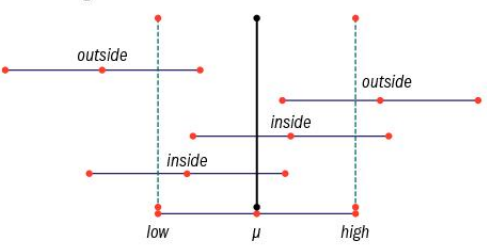


The bottom of the diagram shows $\mu - 1.96 \frac{\sigma}{\sqrt{n}}$, $\mu$, and $\mu + 1.96 \frac{\sigma}{\sqrt{n}}$ as the interval centered on the true population mean $\mu$. There are then four intervals shown, of the same width, centered on four possible observed values of $\bar{x}$. For the bottom two, the value of $\bar{x}$ lies inside the interval centered on $\mu$ but for the top two the value of $\bar{x}$ lies outside. The bold black line shows where the value of $\mu$ is - and it cuts the two bottom intervals but not the top two intervals.  
So 95% of the time the true population mean will be captured by a confidence interval constructed in this way. You should talk about the true population mean lying in the confidence interval on 95% of occasions a confidence interval is constructed rather than talking about a probability.  
The usual size of confidence interval is 95%, but it is not the only possible one.  
Technically, you can construct any size of confidence interval you choose to for a conintuous distribution but in practical terms there are three others which are the most common alternatives: 90%, 98% and 99%.  
<u>Exercise</u>
1. Give the 90% confidence interval
2. Give the 98% confidence interval
3. Give the 99% confidence interval

**Confidence Interval - Small Sample**  
For a **small** sample the central limit theorem is **no longer** valid.  
When we have a small sample ($n < 30$), the assumption we made in the central limit theorem no longer holds. In that case we cannot use the normal distribution.

However, there is still a way to construct a confidence interval via the so-called Student-$t$ distribution. This distribution resembles the normal distribution in that the probability density function looks like a Gauss curve. However, the Student-$t$ distribution also takes the sample size $n$ into account, so you must specify it. The density function gets an extra parameter called the number of *degrees of freedom* (abbreviated `df` of `dof`) and is equal to $n - 1$.

So we can say:  
If a population $X$ has a normal distribution $(X \sim Nor(\mu, \sigma))$ and you take a
_small_ sample with mean $\bar{x}$ and standard deviation $s$, then  
$t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$ 
will behave as a $t$-distribution with $n - 1$ degrees of freedom.

**Student- t  distribution** for different degrees of freedom:  
The smaller the degrees of freedom, the "flatter" the curve and the wider the confidence intervals obtained will be. This represents the greater uncertainty we get because of the small sample size. The larger sample size $n$ is, the closer the curve will approach that of the normal distribution.

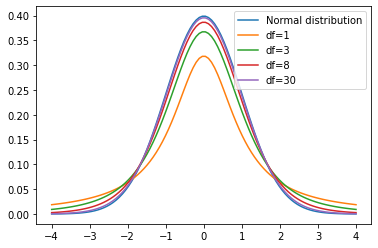

In [ ]:
x = np.linspace(-4, +4, num=100)
fig, tplot = plt.subplots(1, 1)
tplot.plot(x, stats.norm.pdf(x, 0, 1), label="Normal distribution")
tplot.plot(x, stats.t.pdf(x, 1), label="df=1") 
tplot.plot(x, stats.t.pdf(x, 3), label="df=3")
tplot.plot(x, stats.t.pdf(x, 8), label="df=8")
tplot.plot(x, stats.t.pdf(x, 30), label="df=30")
tplot.legend(loc='best')

**Student $t$-distribution in Python**  
Import scipy.stats  
For a $t$-distribution with df degrees of freedom: (df = degrees of freedom)  

| **Function**    | **Purpose** |
| -------- | ------- |
| stats.t.pdf(x, df=d)   | Probability density for $x$    |
| stats.t.cdf(x, df=d) | Left-tail probability 𝑃(𝑋 < x) |
| stats.t.sf(x, df=d)     | Right-tail probability 𝑃(𝑋 > x)    |
| stats.t.isf(1-p, df=d)     | p% of observations are expected to be lower than this value    | 


**Confidence Interval - Small Sample**   
To determine the confidence interval for the mean $\mu$ of a population, based on a small sample, we first calculate $t_{\frac{\alpha}{2},{df}}$.  
With a confidence level of 95% we have $\frac{\alpha}{2} = 0.025$
Assume for example $n = 5$ (so df=4), then we have  
$t_{\frac{\alpha}{2},{df}} $ = stats.t.isf(1-0.975, df=4) = 2.776  

We can say with a confidence of 95% that:  
$ \mu ∈ [\bar{x} - t_{\frac{\alpha}{2},{df}} . \frac{s}{\sqrt{n}}, \bar{x} + t_{\frac{\alpha}{2},{df}} . \frac{s}{\sqrt{n}} ]$ 

<u>Example</u>  
A random sample of 15 cans of mixed beans gave a sample mean of 324.6 grams and we know from historical data that the standard deviation of the population is 2.5. Calculate a 95% confidence interval for the population mean weight.

In [ ]:
import math

# Step 1.
m = 324.6      # Sample mean
s = 2.5      # Population standard deviation
n = 15      # Sample size
alpha = .05  # 1 - alpha is the confidence level

# Step 2.
t = stats.t.isf(alpha/2, df = n - 1)
print("t-score: %.5f" % t)

# Step 3.
lo = m - t * s / np.sqrt(n)
hi = m + t * s / np.sqrt(n)
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

t-score: 2.14479
Confidence interval: [323.2211, 325.9789]


This interval is wider than what we obtained with a larger sample. So we are less certain of the position of the population mean.

<u>Exercise</u>  
The weights, in grams, of bags of cocoa beans are known to have a standard deviation of 6 grams. A random sample of bags is weighed with the following results:  [758, 748, 749, 752, 757, 760, 751, 745, 759, 761]  
Calculate a 95% confidence interval for the mean weight of a bag of cocoa beans.


**Source**  
Complete Probability & Statistics 1 & 2 for Cambridge International AS & A Level